In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

plt.rcParams["figure.figsize"] = (12, 5)
sns.set_theme()

In [3]:
data = fetch_20newsgroups(data_home='data/', subset='all')
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [4]:
n = 10
list(zip(
    data['target'][:n],  # номер группы (размеченный)
    [data['target_names'][i] for i in data['target'][:n]],  # имя группы (размеченное)
    ['/'.join(i.split('\\')[-2:]) for i in data['filenames'][:n]],  # имя файла с текстом
    [i[:300] for i in data['data'][:n]]  # текст файла
))

[(10,
  'rec.sport.hockey',
  'rec.sport.hockey/54367',
  'From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent'),
 (3,
  'comp.sys.ibm.pc.hardware',
  'comp.sys.ibm.pc.hardware/60215',
  'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which high-performance VLB video card?\nSummary: Seek recommendations for VLB video card\nNntp-Posting-Host: midway.ecn.uoknor.edu\nOrganization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA\nKeywords: orchid, stea'),
 (17,
  'talk.politics.mideast',
  'talk.politics.mideast/76120',
  'From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject: Re: ARMENIA SAYS IT COULD SHOOT DOWN TURKISH PLANES (Henrik)\nLines: 95\nNntp-Posting-Host: viktoria.dsv.su.se\nReply-To: hilmi-

In [5]:
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Преобразование текста в набор численных вектором методом TF-IDF
vectorizer = TfidfVectorizer()
X_vec_train = vectorizer.fit_transform(X_train)
X_vec_test = vectorizer.transform(X_test)
len(X_train), X_vec_train.shape

(15076, (15076, 147385))

In [7]:
# Полиномиальный наивный байесовский классификатор подходит для классификации с дискретными функциями
# (хорошо подходит для классификации текстов).
clf = MultinomialNB(alpha=0.01)
clf.fit(X_vec_train, y_train)

MultinomialNB(alpha=0.01)

У модели очень хорошие показатели метрик, в том числе и точность $ 0.92 $ (`precision, recall, f1-score` находятся в диапазоне $ 0.8-1 $)

In [8]:
predict = clf.predict(X_vec_test)
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       151
           1       0.76      0.85      0.80       183
           2       0.87      0.81      0.84       202
           3       0.78      0.84      0.81       184
           4       0.87      0.91      0.89       194
           5       0.87      0.89      0.88       208
           6       0.87      0.79      0.83       175
           7       0.92      0.95      0.93       203
           8       0.95      0.95      0.95       174
           9       0.98      0.96      0.97       216
          10       0.97      0.98      0.98       200
          11       0.97      0.95      0.96       210
          12       0.89      0.89      0.89       190
          13       0.97      0.93      0.95       183
          14       0.93      0.96      0.94       204
          15       0.93      0.96      0.94       193
          16       0.92      0.93      0.92       190
          17       0.98    

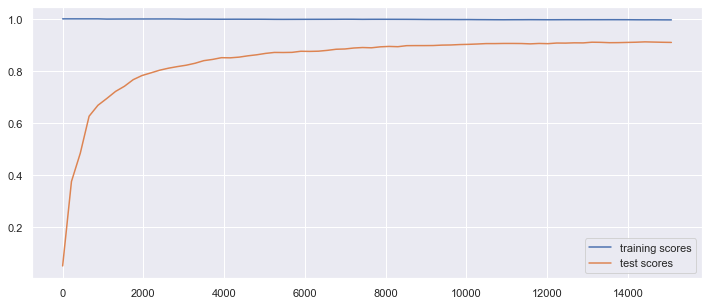

In [9]:
train_scores = []
test_scores = []
axis_x = np.linspace(1, len(X_train), 70)

for i in axis_x:
    x_vec_train = X_vec_train[:int(i)]
    y_train_ = y_train[:int(i)]

    clf = MultinomialNB(alpha=0.01)
    clf.fit(x_vec_train, y_train_)

    train_scores.append(clf.score(x_vec_train, y_train_))
    test_scores.append(clf.score(X_vec_test, y_test))

plt.plot(axis_x, train_scores, label='training scores')
plt.plot(axis_x, test_scores, label='test scores')
_ = plt.legend()

## Вывод

По метрикам модель очень хорошая, а значит применима.

_Ну не положат же разработчики в свою библиотеку примеры данных, на которых реализованные ими алгоритмы не будут работать или будут работать очень плохо._